# Ejercicio de programación Regresión Lineal

In [381]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con una variable

El archivo `Data/ex1data1.txt` contiene el dataset para el problema de regresion lineal. La primera columna es la problacion de una ciudad (en 10,000s) y la segunda columna es el beneficio que genera un camion de comida en esa ciudad (en $10,000s). Un valor negativo indica una perdida.

In [382]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [383]:
# Leer datos separados por una coma
# data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/USA Housing Dataset.csv')
data.head(3)
X, y = data.iloc[:500, 2].values, data.iloc[:500, 4].values #X, y = df.iloc[:1000, 2].values, df.iloc[:1000, 1].values
m = y.size  # m = numero de ejemplos de entrenamiento

In [384]:
print(X)

[3. 4. 5. 3. 5. 3. 4. 4. 3. 4. 3. 4. 4. 3. 4. 2. 3. 1. 3. 3. 4. 2. 5. 3.
 4. 2. 4. 4. 4. 5. 3. 4. 3. 3. 4. 5. 3. 3. 3. 4. 3. 3. 4. 5. 3. 4. 4. 5.
 2. 3. 2. 4. 3. 4. 4. 3. 4. 3. 3. 3. 4. 2. 2. 3. 4. 5. 4. 2. 4. 3. 3. 3.
 4. 4. 4. 2. 4. 4. 2. 2. 3. 4. 4. 4. 4. 5. 3. 4. 5. 3. 3. 4. 2. 3. 3. 5.
 5. 3. 4. 3. 4. 4. 5. 3. 5. 3. 3. 6. 3. 3. 3. 4. 3. 3. 2. 7. 3. 5. 4. 3.
 4. 4. 3. 4. 3. 3. 2. 3. 2. 4. 4. 4. 3. 3. 3. 5. 3. 4. 3. 3. 3. 4. 5. 5.
 3. 3. 5. 3. 4. 4. 3. 5. 3. 3. 3. 3. 3. 4. 4. 3. 3. 4. 4. 4. 4. 3. 4. 3.
 3. 4. 4. 3. 5. 2. 5. 3. 3. 4. 2. 3. 3. 3. 3. 5. 2. 3. 2. 3. 3. 3. 3. 3.
 3. 4. 4. 3. 3. 3. 3. 3. 4. 2. 4. 3. 4. 3. 3. 3. 3. 2. 3. 3. 3. 4. 4. 4.
 3. 5. 3. 2. 3. 4. 3. 5. 2. 4. 4. 5. 3. 2. 3. 4. 4. 3. 4. 4. 4. 4. 4. 3.
 5. 2. 3. 3. 4. 3. 4. 3. 4. 3. 3. 4. 3. 4. 2. 3. 4. 4. 3. 3. 4. 3. 3. 3.
 3. 3. 3. 3. 4. 4. 3. 3. 3. 3. 4. 2. 5. 5. 4. 4. 4. 4. 4. 7. 3. 4. 3. 3.
 3. 3. 3. 3. 3. 4. 4. 2. 3. 4. 3. 4. 3. 3. 3. 4. 3. 4. 3. 3. 4. 3. 3. 3.
 5. 4. 4. 3. 4. 3. 3. 3. 4. 5. 2. 3. 1. 3. 3. 3. 3.

In [385]:
print(y)

[1340 3540 7270  998 3060 2130 2520 1940 1350 2160 1370 5420 2830 2010
 3300 1230 1720  810 1560 2560 4700 1220 3650 2170 2540  910 2980 2120
 3460 2480 2200 1730 2920  990 3040 4530 1370 1940 1040 1800 1720  980
 3110 2100 2020 2350 3290 2180 1290 1460 1290 2350 1080 2670 3680 1440
 1940 1280 2980  970 2110 1480  700 2700 2330 3380 2600 1360 2780 1250
 2620 1350 2400 2760 3070 2040 1770 3490  830  980 1570 3270 2160 3280
 3360 3150 1810 2740 3830 3190 2350 2510 1680 1770 1090 3001 2450 3610
 2250 1240 2260 2090 2020 1960 3120 1250 1490 2890 1900 1680 2030 3740
 1580 1780  910 3440 1740 3400 4400 2010 2710 5300 1310 1950 1040 1090
  650 1480  790 3560 3000 3490 2340 1650 1940 3410 1710 2740 1250 2450
 1690 1950 2290 3370 1090 1190 3530 1440 2180 1410 1950 4860 1660 1390
 1350 1530 1270 2140 2040 2876 1580 3400 3520 2210 2790 1450 1620 1220
 2000 2190 1900 1700 2540 1170 5774 2120 2170 2450  700 1780 1850 1570
 1290 1700 1159 1850  840 1690 1050 1400 2550 1840 2360 2240 2700 3030
 1830 

In [386]:
print(X.size)

500


### 1.1 Trazar los datos

In [387]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Metros Cuadrados Construidos')
    pyplot.xlabel('Habitaciones')


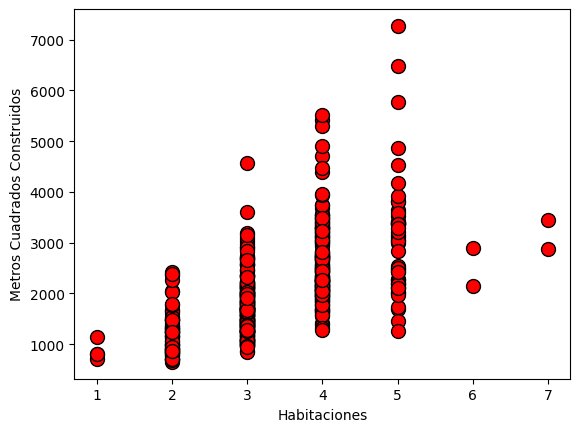

In [388]:
plotData(X, y)

In [389]:
# ?pyplot.plot

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [390]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [391]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [392]:
J = computeCost(X, y, theta=np.array([0.0,0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = computeCost(X, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente)  54.24')

Con theta = [0, 0] 
 Costo calculado = 2602870.24
Valor de costo esperado (aproximadamente) 32.07

Con theta = [-1, 2]
 Costo calculado = 2589807.81
Valor de costo esperado (aproximadamente)  54.24


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [393]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [394]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 300
alpha = 0.003

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

Theta encontrada por descenso gradiente: 147.0985, 576.8772
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


Se utilizan los parametros finales para grafical la linea.

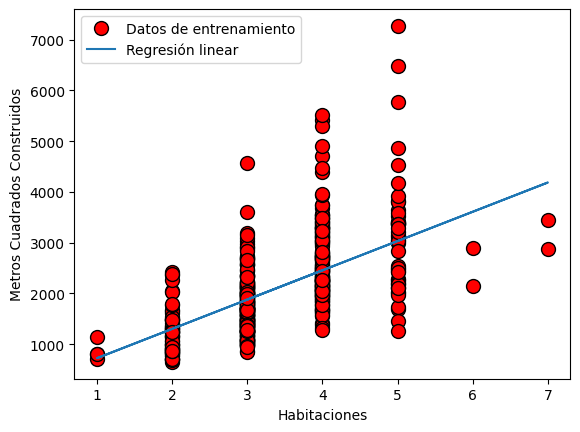

In [395]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [396]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 3.5], theta)
print('Para una población = 35,000, se predice un beneficio de {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 9], theta)
print('Para una población de = 70,000, se predice un beneficio de {:.2f}\n'.format(predict2*10000))

Para una población = 35,000, se predice un beneficio de 21661686.60

Para una población de = 70,000, se predice un beneficio de 53389932.11



### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$.

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

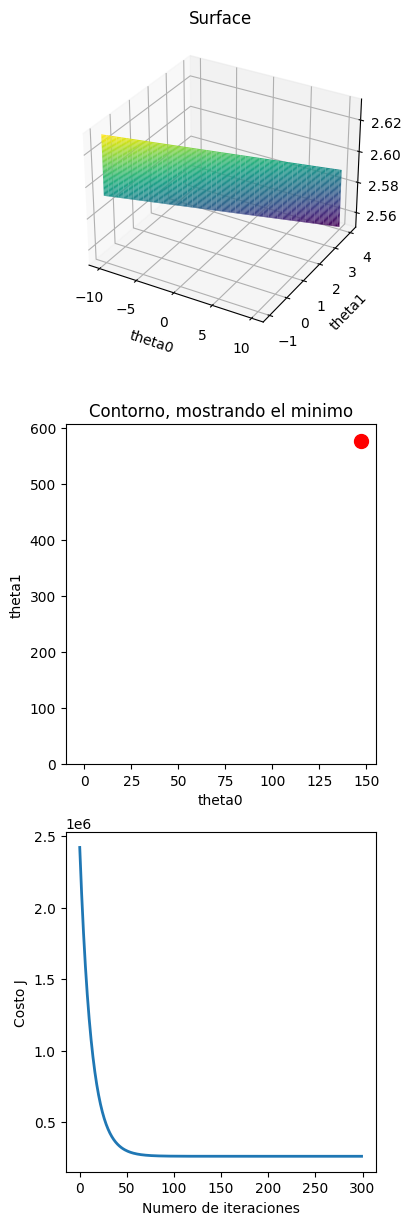

In [397]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass